In [1]:

import pandas as pd
import sys

sys.path.insert(1, '../')

from rule_benchmark import *

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

In [3]:
FOLDERS = ["approach1", "approach2"]

In [4]:
train = pd.read_pickle("train.pkl")
test = pd.read_pickle("test.pkl")


Number of rules:  43
Number of input variables:  5
Number of output variables:  3

approach1/:

Container_DataLayout:


/home/manuel/AutoPas-FuzzyTuning-Bachelor-Thesis/data-analysis/../demo/fuzzy-test/python/fuzzy_system.py:409: RuntimeWarning: overflow encountered in exp
  def function(x): return 1 / (1 + np.exp(-width * (x - center)))


Train: 0.97233670538279
Test: 0.9765596386277622

Traversal:
Train: 0.9784151186020345
Test: 0.983987943863615


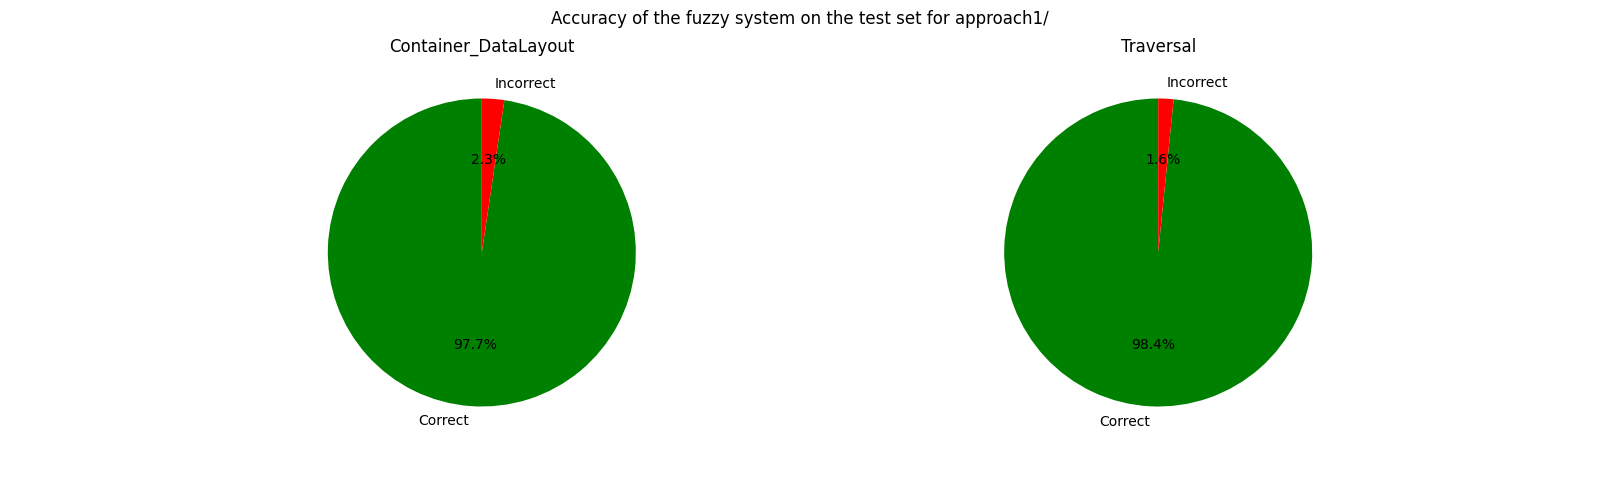

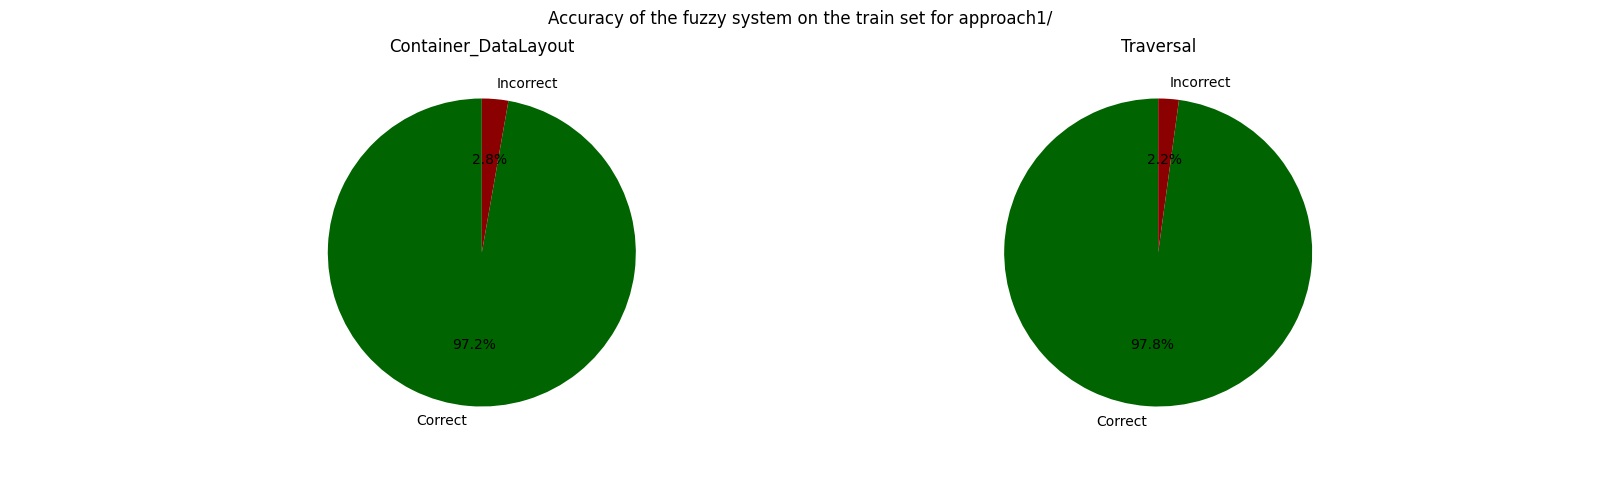

Number of rules:  43
Number of input variables:  5
Number of output variables:  3

approach2/:

Container_DataLayout:
Train: 0.9724000124886821
Test: 0.9765596386277622

Traversal:
Train: 0.9832819958146206
Test: 0.9888123924268503


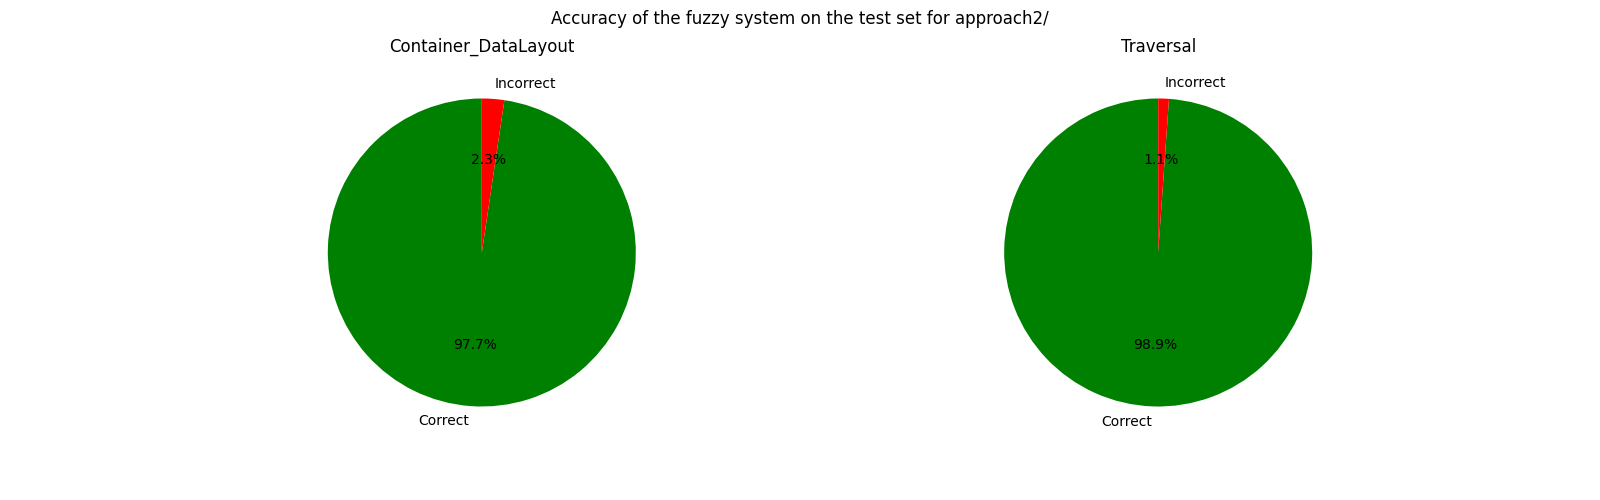

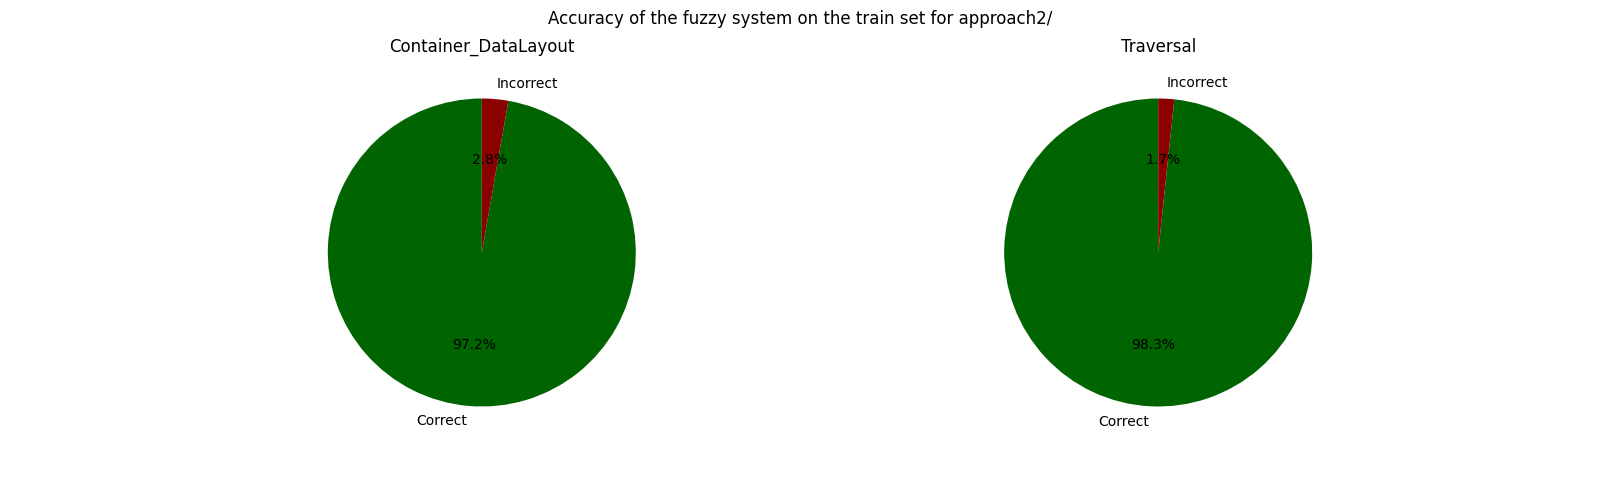

In [5]:
# The K parameter selects how many defuzzified predictions are used in order of decreasing confidence

fiss, algo_ranking = benchmark_rules("approach1/", train, test, K=1, n=600)
fiss, algo_ranking = benchmark_rules("approach2/", train, test, K=1, n=600)

# Findings

- MoM works way better than the other methods.
- This is probably since the output variable is categorical and therefore interpolating between them is not a good idea.
  - Also the placement on the x-axis is somehow arbitrary. This also makes interpolation meaningless
- Traversal is very hard to predict. Maybe because there are so many possible values.

Union:  "("("("("("("("("("("("("("("("("("("("("("("("("("("("("("(Traversal is "vcl_c01_balanced, vcl_c06": Gaussian(6.0, 0.06593406593406594))↑0.00" or "(Traversal is "lc_c18": Gaussian(2.571428571428571, 0.06593406593406594))↑0.00")" or "(Traversal is "lc_c01, lc_sliced_balanced, vcl_c01_balanced, vcl_c06, vcl_cluster_iteration": Gaussian(0.8571428571428571, 0.06593406593406594))↑0.00")" or "(Traversal is "lc_c01, vcl_c01_balanced, vcl_c06, vcl_cluster_iteration": Gaussian(1.7142857142857142, 0.06593406593406594))↑0.00")" or "(Traversal is "vcl_c06": Gaussian(8.571428571428571, 0.06593406593406594))↑0.00")" or "(Traversal is "vcl_c01_balanced": Gaussian(5.142857142857142, 0.06593406593406594))↑0.00")" or "(Traversal is "vcl_c01_balanced, vcl_c06, vcl_cluster_iteration": Gaussian(6.857142857142857, 0.06593406593406594))↑0.00")" or "(Traversal is "vlp_c08, vlp_c18, vlp_sliced, vlp_sliced_balanced, vlp_sliced_c02": Gaussian(10.285714285714285, 0.06593406593406594))↑0.00")" or "(Traver

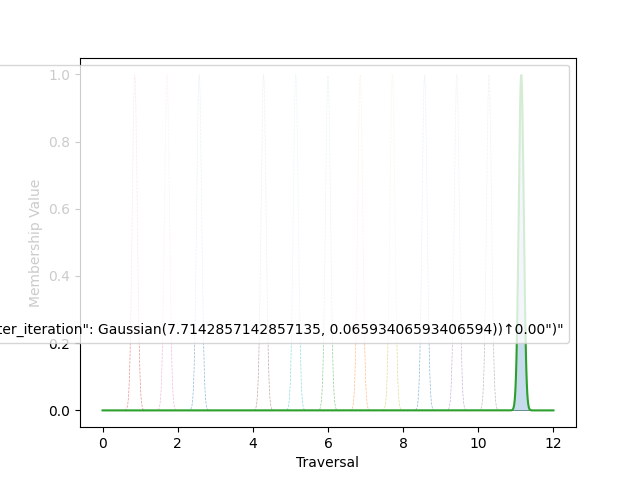

In [6]:
data = {"maxDensity": 0.2, "maxParticlesPerCell": 5,  "homogeneity": 0.5,
        "particlesPerCellStdDev": 1, "avgParticlesPerCell": 1.2, "threadCount": 10}


union = fiss["Traversal"].applyRules(data)

fig, ax = plt.subplots()
union.plot(ax=ax, n=1000)

print("Union: ", union)

prediction = fiss["Traversal"].predictClosest(
    data, algo_ranking["Traversal"], n=600)[1]

print("Prediction: ", prediction)